Here I want to make a small test on 3rd order polynomial interpolation

In [1]:
using Symbolics,CairoMakie
using SymbolicUtils
using BasicInterpolators


In [2]:
myInclude("../src/mainStructures.jl")

In [3]:
rawArray=[0.0, 1.0, 1.0, 96.0, 3.0, 11.0, 92.0, 0.0, 6844.77, 5548.28, 0.0, 10000.0, 0.0, 5548.28, 0.0, 1.0, 5000.0, 6844.77, 5548.28, 0.0, 10000.0, 0.0, 5548.28, 0.0, 1.0, 10000.0, 6844.77, 5548.28, 0.0, 10000.0, 0.0, 5548.28, 0.0, 1.0, 10000.0, 6844.77, 5548.28, 0.0, 10000.0, 0.0, 5548.28, 0.0, 1.0, 241903.0, 6844.77, 5548.28, 0.0, 10000.0, 0.0, 5548.28, 0.0, 1.0, 483806.0, 6807.97, 5513.94, 0.0, 10000.0, 0.0, 5513.94, 0.0, 1.0, 725708.0, 6746.28, 5456.31, 0.0, 10000.0, 0.0, 5456.31, 0.0, 1.0, 967611.0, 6659.11, 5374.78, 0.0, 10000.0, 0.0, 5374.78, 0.0, 1.0, 1.209514e6, 6545.6, 5268.4, 0.0, 10000.0, 0.0, 5268.4, 0.0, 1.0, 1.451417e6, 6404.46, 5135.8, 0.0, 10000.0, 0.0, 5135.8, 0.0, 1.0, 1.69332e6, 6233.92, 4975.09, 0.0, 10000.0, 0.0, 4975.09, 0.0, 1.0, 1.69332e6, 4085.57, 9650.03, 5023.28, 10000.0, 118.5, 9650.03, 5023.28, 1.0, 1.715805e6, 4079.91, 9634.76, 5016.06, 10000.0, 118.7, 9634.76, 5016.06, 1.0, 1.738289e6, 4074.27, 9619.53, 5008.9, 10000.0, 119.1, 9619.53, 5008.9, 1.0, 1.760774e6, 4069.12, 9605.33, 5002.62, 10000.0, 119.5, 9605.33, 5002.62, 1.0, 1.783259e6, 4063.41, 9589.93, 4995.38, 10000.0, 120.0, 9589.93, 4995.38, 1.0, 1.805743e6, 4052.43, 9560.59, 4977.31, 10000.0, 120.6, 9560.59, 4977.31, 1.0, 1.828228e6, 4039.04, 9523.79, 4953.85, 10000.0, 121.1, 9523.79, 4953.85, 1.0, 1.850713e6, 4033.07, 9507.04, 4946.32, 10000.0, 121.9, 9507.04, 4946.32, 1.0, 1.873197e6, 4027.44, 9491.23, 4939.38, 10000.0, 122.7, 9491.23, 4939.38, 1.0, 1.895682e6, 4021.42, 9474.66, 4931.78, 10000.0, 123.6, 9474.66, 4931.78, 1.0, 1.918167e6, 4015.32, 9457.17, 4924.17, 10000.0, 124.5, 9457.17, 4924.17, 1.0, 1.940651e6, 4008.8, 9439.12, 4916.03, 10000.0, 125.5, 9439.12, 4916.03, 1.0, 1.963136e6, 4002.24, 9421.2, 4908.27, 10000.0, 126.5, 9421.2, 4908.27, 1.0, 1.985621e6, 3989.48, 9374.75, 4882.46, 10000.0, 127.2, 9374.75, 4882.46, 1.0, 2.008105e6, 3972.51, 9310.8, 4846.33, 10000.0, 127.6, 9310.8, 4846.33, 1.0, 2.03059e6, 3960.24, 9263.45, 4821.41, 10000.0, 128.1, 9263.45, 4821.41, 1.0, 2.053075e6, 3945.99, 9209.08, 4792.27, 10000.0, 128.5, 9209.08, 4792.27, 1.0, 2.07556e6, 3933.7, 9160.66, 4767.64, 10000.0, 129.1, 9160.66, 4767.64, 1.0, 2.098044e6, 3919.51, 9104.69, 4738.55, 10000.0, 129.7, 9104.69, 4738.55, 1.0, 2.120529e6, 3913.09, 9086.71, 4731.96, 10000.0, 130.9, 9086.71, 4731.96, 1.0, 2.143014e6, 3905.28, 9066.42, 4724.23, 10000.0, 132.2, 9066.42, 4724.23, 1.0, 2.165498e6, 3898.63, 9047.67, 4717.4, 10000.0, 133.5, 9047.67, 4717.4, 1.0, 2.187983e6, 3891.26, 9027.96, 4711.01, 10000.0, 134.9, 9027.96, 4711.01, 1.0, 2.210468e6, 3883.56, 9006.77, 4702.37, 10000.0, 136.3, 9006.77, 4702.37, 1.0, 2.232952e6, 3876.72, 8987.51, 4695.68, 10000.0, 137.7, 8987.51, 4695.68, 1.0, 2.255437e6, 3869.61, 8967.82, 4689.14, 10000.0, 139.1, 8967.82, 4689.14, 1.0, 2.277922e6, 3862.41, 8948.36, 4683.34, 10000.0, 140.3, 8948.36, 4683.34, 1.0, 2.300406e6, 3800.99, 8719.44, 4544.86, 10000.0, 139.1, 8719.44, 4544.86, 1.0, 2.322891e6, 3750.35, 8541.07, 4440.16, 10000.0, 138.2, 8541.07, 4440.16, 1.0, 2.345376e6, 3728.47, 8472.0, 4404.36, 10000.0, 139.0, 8472.0, 4404.36, 1.0, 2.36786e6, 3719.63, 8430.38, 4377.58, 10000.0, 140.0, 8430.38, 4377.58, 1.0, 2.390345e6, 3707.81, 8395.96, 4363.19, 10000.0, 141.5, 8395.96, 4363.19, 1.0, 2.41283e6, 3696.58, 8362.55, 4349.79, 10000.0, 142.9, 8362.55, 4349.79, 1.0, 2.435314e6, 3686.2, 8330.33, 4336.49, 10000.0, 144.3, 8330.33, 4336.49, 1.0, 2.457799e6, 3676.33, 8301.05, 4324.97, 10000.0, 145.7, 8301.05, 4324.97, 1.0, 2.480284e6, 3667.69, 8274.58, 4315.4, 10000.0, 147.1, 8274.58, 4315.4, 1.0, 2.502769e6, 3659.17, 8247.83, 4305.53, 10000.0, 148.4, 8247.83, 4305.53, 1.0, 2.525253e6, 3650.83, 8221.61, 4296.2, 10000.0, 149.7, 8221.61, 4296.2, 1.0, 2.547738e6, 3643.05, 8197.21, 4287.61, 10000.0, 150.9, 8197.21, 4287.61, 1.0, 2.570223e6, 3635.33, 8172.9, 4279.24, 10000.0, 152.0, 8172.9, 4279.24, 1.0, 2.592707e6, 3627.66, 8148.91, 4271.52, 10000.0, 153.0, 8148.91, 4271.52, 1.0, 2.615192e6, 3619.93, 8124.41, 4263.36, 10000.0, 154.0, 8124.41, 4263.36, 1.0, 2.637677e6, 3612.44, 8100.75, 4255.6, 10000.0, 154.9, 8100.75, 4255.6, 1.0, 2.660161e6, 3605.07, 8077.23, 4247.86, 10000.0, 155.6, 8077.23, 4247.86, 1.0, 2.682646e6, 3597.5, 8053.01, 4240.2, 10000.0, 156.2, 8053.01, 4240.2, 1.0, 2.705131e6, 3590.15, 8029.06, 4232.48, 10000.0, 156.6, 8029.06, 4232.48, 1.0, 2.727615e6, 3582.18, 8003.71, 4224.61, 10000.0, 157.0, 8003.71, 4224.61, 1.0, 2.7501e6, 3574.2, 7977.75, 4216.45, 10000.0, 157.1, 7977.75, 4216.45, 1.0, 2.772585e6, 3566.65, 7953.42, 4208.86, 10000.0, 157.1, 7953.42, 4208.86, 1.0, 2.795069e6, 3558.98, 7928.1, 4200.9, 10000.0, 157.0, 7928.1, 4200.9, 1.0, 2.817554e6, 3551.34, 7903.06, 4193.14, 10000.0, 156.7, 7903.06, 4193.14, 1.0, 2.840039e6, 3543.82, 7878.16, 4185.41, 10000.0, 156.2, 7878.16, 4185.41, 1.0, 2.862524e6, 3536.13, 7853.04, 4177.56, 10000.0, 155.6, 7853.04, 4177.56, 1.0, 2.885008e6, 3527.99, 7826.88, 4170.0, 10000.0, 154.8, 7826.88, 4170.0, 1.0, 2.907428e6, 3520.31, 7800.11, 4161.51, 10000.0, 153.8, 7800.11, 4161.51, 1.0, 2.929703e6, 3512.08, 7771.8, 4152.88, 10000.0, 152.7, 7771.8, 4152.88, 1.0, 2.951967e6, 3503.61, 7742.46, 4143.46, 10000.0, 151.3, 7742.46, 4143.46, 1.0, 2.974156e6, 3495.14, 7713.9, 4135.23, 10000.0, 149.8, 7713.9, 4135.23, 1.0, 2.99636e6, 3486.59, 7683.74, 4125.78, 10000.0, 148.1, 7683.74, 4125.78, 1.0, 3.018528e6, 3477.51, 7651.52, 4116.21, 10000.0, 146.3, 7651.52, 4116.21, 1.0, 3.040964e6, 3468.19, 7617.81, 4106.39, 10000.0, 144.3, 7617.81, 4106.39, 1.0, 3.0645e6, 3458.3, 7581.59, 4095.71, 10000.0, 142.1, 7581.59, 4095.71, 1.0, 3.0895e6, 3446.88, 7538.81, 4083.3, 10000.0, 139.7, 7538.81, 4083.3, 1.0, 3.1095e6, 3437.1, 7499.5, 4071.11, 10000.0, 137.6, 7499.5, 4071.11, 1.0, 3.1295e6, 3425.78, 7452.5, 4058.06, 10000.0, 135.5, 7452.5, 4058.06, 1.0, 3.1495e6, 3414.32, 7404.89, 4045.74, 10000.0, 133.4, 7404.89, 4045.74, 1.0, 3.1695e6, 3399.97, 7341.03, 4028.62, 10000.0, 131.3, 7341.03, 4028.62, 1.0, 3.1895e6, 3388.53, 7294.36, 4016.54, 10000.0, 129.2, 7294.36, 4016.54, 1.0, 3.1995e6, 3384.48, 7279.69, 4012.79, 10000.0, 128.2, 7279.69, 4012.79, 1.0, 3.2095e6, 3380.42, 7265.1, 4009.15, 10000.0, 127.3, 7265.1, 4009.15, 1.0, 3.2195e6, 3376.34, 7250.41, 4005.52, 10000.0, 126.4, 7250.41, 4005.52, 1.0, 3.2295e6, 3372.12, 7235.71, 4001.97, 10000.0, 125.5, 7235.71, 4001.97, 1.0, 3.2395e6, 3368.02, 7219.85, 3998.12, 10000.0, 124.7, 7219.85, 3998.12, 1.0, 3.2495e6, 3363.61, 7202.72, 3993.51, 10000.0, 123.4, 7202.72, 3993.51, 1.0, 3.2595e6, 3359.26, 7186.62, 3989.22, 10000.0, 122.1, 7186.62, 3989.22, 1.0, 3.2695e6, 3354.71, 7169.51, 3984.36, 10000.0, 120.6, 7169.51, 3984.36, 1.0, 3.2795e6, 3349.88, 7150.24, 3978.62, 10000.0, 118.7, 7150.24, 3978.62, 1.0, 3.2895e6, 3345.16, 7132.1, 3973.24, 10000.0, 116.9, 7132.1, 3973.24, 1.0, 3.2995e6, 3359.5, 7212.61, 4159.16, 10000.0, 152.0, 7212.61, 4159.16, 1.0, 3.30594e6, 3368.4, 7262.09, 4188.83, 10000.0, 156.1, 7262.09, 4188.83, 1.0, 3.317191e6, 3196.59, 6684.12, 3784.8, 10000.0, 127.4, 6684.12, 3784.8, 1.0, 3.317191e6, 3076.41, 6601.63, 3443.62, 10000.0, 127.4, 6601.63, 3443.62, 1.0, 3.321726e6, 3076.41, 6601.63, 3443.62, 10000.0, 119.0, 6601.63, 3443.62, 1.0, 3.321726e6, 2954.01, 5989.61, 3035.61, 10000.0, 119.0, 5989.61, 3035.61, 1.0, 3.3895e6, 2954.01, 5989.61, 3035.61, 10000.0, 600.0, 5989.61, 3035.61, 1.0]

871-element Vector{Float64}:
     0.0
     1.0
     1.0
    96.0
     3.0
    11.0
    92.0
     0.0
  6844.77
  5548.28
     ⋮
     3.3895e6
  2954.01
  5989.61
  3035.61
 10000.0
   600.0
  5989.61
  3035.61
     1.0

In [4]:
nzoneMINEOS=Int64(rawArray[4])
nzoneMINEOS = Int64(rawArray[4])
tmpRadius = rawArray[8:9:end]*1.e-3
tmpDensity = rawArray[9:9:end]*1.e-3
tmpVpv = rawArray[10:9:end]*1.e-3
tmpVsv = rawArray[11:9:end]*1.e-3
tmpQκ = rawArray[12:9:end]
tmpQμ = rawArray[13:9:end]
tmpVph = rawArray[14:9:end]*1.e-3
tmpVsh = rawArray[15:9:end]*1.e-3
tmpη = rawArray[16:9:end];


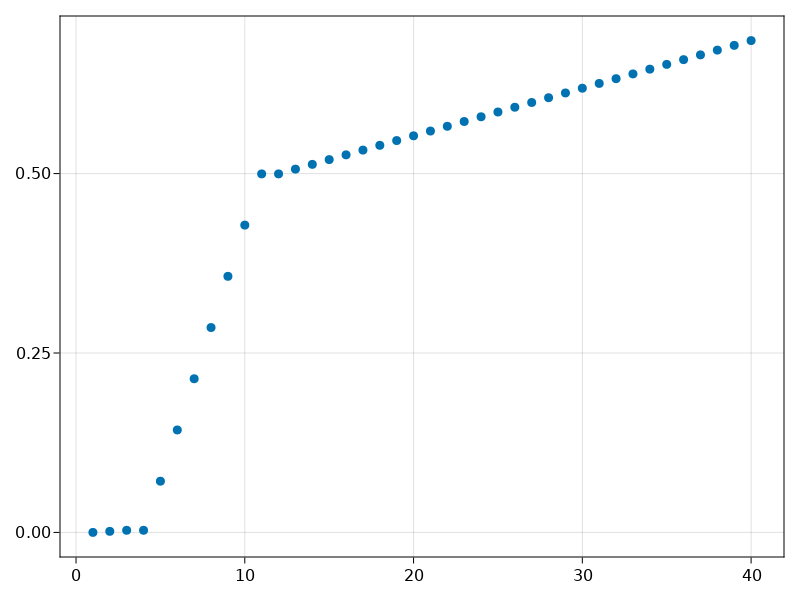

In [5]:
tmpaveragedPlanetRadius=0.e0
for i in 1:length(tmpRadius)
    #println(tmpVsv[i])
    if tmpVsv[i] != 0.0
        tmpaveragedPlanetRadius=tmpRadius[i]
    end
end
normalisedRadius = tmpRadius/tmpaveragedPlanetRadius;
CairoMakie.scatter(normalisedRadius[1:40])

In [6]:
function modifyLinearCoefs(nLayers, tmpCoefs, normalisedtmpBottomRadius, normalisedtmpTopRadius, 傾き許容度,eps)
    # This is a function that takes the coefficients of the linear interpolation and tries to reduce the number of layers by fusing them up to 3rd order polynomials
    # 傾き許容度 is the tolerance for the slope change to be considered for a fusion
    # eps is the tolerance for the error in interpolation
    coefs=zeros(Float64, nLayers, 4)
    i=1 
    while i <= nLayers
    
        # we don't do anything if there is a jump
        if i+1 <= nLayers && isapprox((tmpCoefs[i+1][1]-tmpCoefs[i][1]) + (tmpCoefs[i+1][2]-tmpCoefs[i][2]) * normalisedtmpTopRadius[i] , 0.0 ; atol=eps)
           
        # we change only if the slope changes a little bit
            if i+1 <= nLayers && tmpCoefs[i][2] != 0.e0  && abs(tmpCoefs[i+1][2]-tmpCoefs[i][2])/abs(tmpCoefs[i][2]) < 傾き許容度 
                # normally this will make a second-order polynomial

                # but first we test if we can regroup one more layers above
                if i+2 <= nLayers && isapprox((tmpCoefs[i+2][1]-tmpCoefs[i+1][1]) + (tmpCoefs[i+2][2]-tmpCoefs[i+1][2]) * normalisedtmpTopRadius[i] , 0.0 ; atol=1.e-4) &&tmpCoefs[i+1][2] != 0.e0 && abs(tmpCoefs[i+2][2]-tmpCoefs[i+1][2])/abs(tmpCoefs[i+1][2]) < 傾き許容度 
                    # create an optimised Vandermonde matrix and get the coefs for a third-order polynomial
                    x₀=normalisedtmpBottomRadius[i]
                    x₁=normalisedtmpTopRadius[i]
                    x₂=normalisedtmpTopRadius[i+1]
                    x₃=normalisedtmpTopRadius[i+2]

                    A=[x₁-x₀  x₁^2-x₀^2  x₁^3-x₀^3;
                    x₂-x₁  x₂^2-x₁^2  x₂^3-x₁^3;
                    x₃-x₂  x₃^2-x₂^2  x₃^3-x₂^3]
                    #c=[c₀; c₁; c₂]
        
                    y₀=tmpCoefs[i][1]+tmpCoefs[i][2]*x₀ 
                    y₁=tmpCoefs[i][1]+tmpCoefs[i][2]*x₁
                    y₂=tmpCoefs[i+1][1]+tmpCoefs[i+1][2]*x₂
                    y₃=tmpCoefs[i+2][1]+tmpCoefs[i+2][2]*x₃

                    y=[tmpCoefs[i][2]*(x₁-x₀); tmpCoefs[i+1][2]*(x₂-x₁); tmpCoefs[i+2][2]*(x₃-x₂)]
                
                    invA=inv(A)

                    xc=invA*y
                    c₁=xc[1]
                    c₂=xc[2]
                    c₃=xc[3]
                    c₀ = y₀-c₁*x₀-c₂*x₀^2-c₃*x₀^3

                    coefs[i,:]=[c₀,c₁,c₂,c₃]
                    coefs[i+1,:]=[c₀,c₁,c₂,c₃]
                    coefs[i+2,:]=[c₀,c₁,c₂,c₃]


                    i+=1 # we skip the next layer because it is already included in the polynomial (twice since i+=1 reads at the outer loop as well)

                else
                    x₀=normalisedtmpBottomRadius[i]
                    x₁=normalisedtmpTopRadius[i]
                    x₂=normalisedtmpTopRadius[i+1]


                    A=[x₁-x₀  x₁^2-x₀^2 ;
                    x₂-x₁  x₂^2-x₁^2 ]
                    #c=[c₀; c₁; c₂]
        
                    y₀=tmpCoefs[i][1]+tmpCoefs[i][2]*x₀ 
                    y₁=tmpCoefs[i][1]+tmpCoefs[i][2]*x₁
                    y₂=tmpCoefs[i+1][1]+tmpCoefs[i+1][2]*x₂


                    y=[tmpCoefs[i][2]*(x₁-x₀); tmpCoefs[i+1][2]*(x₂-x₁)]
                
                    invA=inv(A)

                    xc=invA*y
                    c₁=xc[1]
                    c₂=xc[2]

                    c₀ = y₀-c₁*x₀-c₂*x₀^2

                    coefs[i,:]=[c₀,c₁,c₂,0.e0]
                    coefs[i+1,:]=[c₀,c₁,c₂,0.e0]
      




                    """
                    # we create a second-order polynomial
                    a₀⁰=tmpCoefs[i][1]
                    a₁⁰=tmpCoefs[i][2]
                    a₀¹=tmpCoefs[i+1][1]
                    a₁¹=tmpCoefs[i+1][2]
                
                    x₀=normalisedtmpBottomRadius[i]
                    x₁=normalisedtmpBottomRadius[i+1]
                    x₂=normalisedtmpTopRadius[i+1]
                    y₀=tmpCoefs[i][1]+tmpCoefs[i][2]*x₀ 
                    b₂⁰ = (a₁¹-a₁⁰)/(x₂-x₀)
                    averageA₁=(a₁⁰*(x₂-x₁)+a₁¹*(x₁-x₀))/(x₂-x₀) # effective slope at the middle point
                    b₁⁰ = averageA₁-2*b₂⁰*x₁
                    b₀⁰ = y₀-b₁⁰*x₀-b₂⁰*x₀^2
                    coefs[i,:]=[b₀⁰,b₁⁰,b₂⁰,0.0]
                    coefs[i+1,:]=[b₀⁰,b₁⁰,b₂⁰,0.0]

                    """

                end
                i+=1 # we skip the next layer because it is already included in the polynomial
            else
                coefs[i,:]=[tmpCoefs[i][1],tmpCoefs[i][2],0.0,0.0]
            end
        else
            coefs[i,:]=[tmpCoefs[i][1],tmpCoefs[i][2],0.0,0.0]  
        end

        i+=1 # normal incrementation
    end
    
    # The coefficients above should be 'exact' for each point 
   
    # We then scan from the bottom to the top again to see if we can further reduce the independent coefficients

    i=1
    while i <= nLayers

        if i+1 <= nLayers && coefs[i,:] != coefs[i+1,:]
            # we test the lower coefficients to see if the next layer can be fused
            x₂ = normalisedtmpTopRadius[i+1]
            realValue= coefs[i+1,1]+coefs[i+1,2]*x₂+coefs[i+1,3]*x₂^2+coefs[i+1,4]*x₂^3
            extrapolatedValueFromLowerLayer= coefs[i,1]+coefs[i,2]*x₂+coefs[i,3]*x₂^2+coefs[i,4]*x₂^3
            if abs(realValue-extrapolatedValueFromLowerLayer)/abs(realValue) < eps
                # we can fuse the two layers
                coefs[i+1,:]=coefs[i,:]
            end
        end
        i+=1
    end 


    return coefs
end 

function reduceLayersDSM(tmpCoefs::DSM1DPSVmodel)
    nLayers=tmpCoefs.nzone
    j_start=[]
    j_end=[]
    i=1
    while i <= nLayers
        push!(j_start,i)
        while i+1 <= nLayers && tmpCoefs.C_ρ[i,:] == tmpCoefs.C_ρ[i+1,:] && tmpCoefs.C_Vpv[i,:] == tmpCoefs.C_Vpv[i+1,:] && tmpCoefs.C_Vph[i,:] == tmpCoefs.C_Vph[i+1,:] && tmpCoefs.C_Vsv[i,:] == tmpCoefs.C_Vsv[i+1,:] && tmpCoefs.C_Vsh[i,:] == tmpCoefs.C_Vsh[i+1,:] && tmpCoefs.C_Qκ[i,:] == tmpCoefs.C_Qκ[i+1,:] && tmpCoefs.C_Qμ[i,:] == tmpCoefs.C_Qμ[i+1,:] && tmpCoefs.C_QκPower[i,:] == tmpCoefs.C_QκPower[i+1,:] && tmpCoefs.C_QμPower[i,:] == tmpCoefs.C_QμPower[i+1,:] && tmpCoefs.C_η[i,:] == tmpCoefs.C_η[i+1,:]
            i+=1
        end
        push!(j_end,i)
        i+=1
    end
    nLayers=length(j_start)
    Coefs=DSM1DPSVmodel(nLayers,tmpCoefs.averagedPlanetRadiusInKilometer)
    for i in 1:nLayers
        Coefs.topRadius[i]=tmpCoefs.topRadius[j_end[i]]
        Coefs.bottomRadius[i]=tmpCoefs.bottomRadius[j_start[i]]
        Coefs.normalisedTopRadius[i]=tmpCoefs.normalisedTopRadius[j_end[i]]
        Coefs.normalisedBottomRadius[i]=tmpCoefs.normalisedBottomRadius[j_start[i]]
        Coefs.C_ρ[i,:]=tmpCoefs.C_ρ[j_start[i],:]
        Coefs.C_Vpv[i,:]=tmpCoefs.C_Vpv[j_start[i],:]
        Coefs.C_Vph[i,:]=tmpCoefs.C_Vph[j_start[i],:]
        Coefs.C_Vsv[i,:]=tmpCoefs.C_Vsv[j_start[i],:]
        Coefs.C_Vsh[i,:]=tmpCoefs.C_Vsh[j_start[i],:]
        Coefs.C_Qκ[i,:]=tmpCoefs.C_Qκ[j_start[i],:]
        Coefs.C_Qμ[i,:]=tmpCoefs.C_Qμ[j_start[i],:]
        Coefs.C_QκPower[i,:]=tmpCoefs.C_QκPower[j_start[i],:]
        Coefs.C_QμPower[i,:]=tmpCoefs.C_QμPower[j_start[i],:]
        Coefs.C_η[i,:]=tmpCoefs.C_η[j_start[i],:]
    end
    
    return Coefs
end

function compute1DseismicParametersFromPolynomialCoefficients(nLayers, coefs, normalisedtmpBottomRadius, normalisedtmpTopRadius, normalisedRadius::Float64)
    # this function will compute the seismic parameters from the polynomial coefficients and the normalised radii
   
    for i in 1:nLayers
        if normalisedRadius >= normalisedtmpBottomRadius[i] && normalisedRadius <= normalisedtmpTopRadius[i]
            return coefs[i,1]+coefs[i,2]*normalisedRadius+coefs[i,3]*normalisedRadius^2+coefs[i,4]*normalisedRadius^3
        end
    end
    error("Radius is not in the model")
end

function compute1DseismicParamtersFromPolynomialCoefficients(Coefs::DSM1DPSVmodel, numPointsPerLayer::Int64)
    # this function will compute the seismic parameters from the polynomial coefficients and the normalised radii
    nLayers=Coefs.nzone
    normalisedtmpBottomRadius=Coefs.bottomRadius./Coefs.averagedPlanetRadiusInKilometer
    normalisedtmpTopRadius=Coefs.topRadius./Coefs.averagedPlanetRadiusInKilometer

    if numPointsPerLayer < 3
        numPointsPerLayer= 3
    end
    radius=Float64[]
    #parameter()=parameter(ρ=Array{Float64,1}(undef,0))
    parameter=(ρ=Float64[],Vpv=Float64[],Vph=Float64[],Vsv=Float64[],Vsh=Float64[],Qμ=Float64[],Qκ=Float64[],QμPower=Float64[],QκPower=Float64[],η=Float64[])
    #parameter=(ρ= Array{Float64,1}[],Vpv=[],Vph=[],Vsv=[],Vsh=[],Qμ=[],Qκ=[],QμPower=[],QκPower=[],η=[])
    for i in 1:nLayers
        radiusInterval = (normalisedtmpTopRadius[i]-normalisedtmpBottomRadius[i])/convert(Float64,numPointsPerLayer-1)
        for j in 1:numPointsPerLayer
            x = normalisedtmpBottomRadius[i]+radiusInterval*convert(Float64,j-1)
            push!(radius,x)
            push!(parameter.ρ,Coefs.C_ρ[i,1]+Coefs.C_ρ[i,2]*x+Coefs.C_ρ[i,3]*x^2+Coefs.C_ρ[i,4]*x^3)
            push!(parameter.Vpv,Coefs.C_Vpv[i,1]+Coefs.C_Vpv[i,2]*x+Coefs.C_Vpv[i,3]*x^2+Coefs.C_Vpv[i,4]*x^3)
            push!(parameter.Vph,Coefs.C_Vph[i,1]+Coefs.C_Vph[i,2]*x+Coefs.C_Vph[i,3]*x^2+Coefs.C_Vph[i,4]*x^3)
            push!(parameter.Vsv,Coefs.C_Vsv[i,1]+Coefs.C_Vsv[i,2]*x+Coefs.C_Vsv[i,3]*x^2+Coefs.C_Vsv[i,4]*x^3)
            push!(parameter.Vsh,Coefs.C_Vsh[i,1]+Coefs.C_Vsh[i,2]*x+Coefs.C_Vsh[i,3]*x^2+Coefs.C_Vsh[i,4]*x^3)
            push!(parameter.Qμ,Coefs.C_Qμ[i,1]+Coefs.C_Qμ[i,2]*x+Coefs.C_Qμ[i,3]*x^2+Coefs.C_Qμ[i,4]*x^3)
            push!(parameter.Qκ,Coefs.C_Qκ[i,1]+Coefs.C_Qκ[i,2]*x+Coefs.C_Qκ[i,3]*x^2+Coefs.C_Qκ[i,4]*x^3)
            push!(parameter.QμPower,Coefs.C_QμPower[i,1]+Coefs.C_QμPower[i,2]*x+Coefs.C_QμPower[i,3]*x^2+Coefs.C_QμPower[i,4]*x^3)
            push!(parameter.QκPower,Coefs.C_QκPower[i,1]+Coefs.C_QκPower[i,2]*x+Coefs.C_QκPower[i,3]*x^2+Coefs.C_QκPower[i,4]*x^3)
            push!(parameter.η,Coefs.C_η[i,1]+Coefs.C_η[i,2]*x+Coefs.C_η[i,3]*x^2+Coefs.C_η[i,4]*x^3)
        end
    end


    return radius, parameter
end



compute1DseismicParamtersFromPolynomialCoefficients (generic function with 1 method)

In [22]:
傾き許容度=2
eps=1.5e-3

# we don't change the number of layers for each parameter, we will fusion at the end
nLayers=0
normalisedtmpBottomRadius=Float64[]
normalisedtmpTopRadius=Float64[]
tmpBottomRadius=Float64[]
tmpTopRadius=Float64[]

#tmpCoefs=(Density=Array{Float64, 2}[], Vpv=Array{Float64, 2}[], Vsv=Array{Float64, 2}[], Qκ=Array{Float64, 2}[], Qμ=Array{Float64, 2}[], Vph=Array{Float64, 2}[], Vsh=Array{Float64, 2}[], η=Array{Float64, 2}[])
#tmpCoefs=(Density=Vector{Float64}(), Vpv=Vector{Float64}(), Vsv=Vector{Float64}(), Qκ=Vector{Float64}(), Qμ=Vector{Float64}(), Vph=Vector{Float64}(), Vsh=Vector{Float64}(), η=Vector{Float64}())

#tmpCoefs=NamedTuple{(:Density, :Vpv, :Vsv, :Qκ, :Qμ, :Vph, :Vsh, :η),Tuple{Array{Float64,2},Array{Float64,2},Array{Float64,2},Array{Float64,2},Array{Float64,2},Array{Float64,2},Array{Float64,2},Array{Float64,2},Array{Float64,2},Array{Float64,2}}}()
tmpCoefs=(Density=[], Vpv=[], Vsv=[], Qκ=[], Qμ=[], Vph=[], Vsh=[], η=[])
for i in 1:length(normalisedRadius)-1

    if tmpRadius[i] != tmpRadius[i+1]

        #print(tmpRadius[i], " ", tmpRadius[i+1], "\n")
        nLayers+=1
        # Density
        a=(tmpDensity[i+1]-tmpDensity[i])/(normalisedRadius[i+1]-normalisedRadius[i])
        b=tmpDensity[i]-a*normalisedRadius[i]
        push!(tmpCoefs.Density,[b,a])
        push!(normalisedtmpBottomRadius,normalisedRadius[i])
        push!(normalisedtmpTopRadius,normalisedRadius[i+1])
        push!(tmpBottomRadius,tmpRadius[i])
        push!(tmpTopRadius,tmpRadius[i+1])
        # Vpv
        a=(tmpVpv[i+1]-tmpVpv[i])/(normalisedRadius[i+1]-normalisedRadius[i])
        b=tmpVpv[i]-a*normalisedRadius[i]
        push!(tmpCoefs.Vpv,[b,a])
        # Vsv
        a=(tmpVsv[i+1]-tmpVsv[i])/(normalisedRadius[i+1]-normalisedRadius[i])
        b=tmpVsv[i]-a*normalisedRadius[i]
        push!(tmpCoefs.Vsv,[b,a])
        # Qκ
        a=(tmpQκ[i+1]-tmpQκ[i])/(normalisedRadius[i+1]-normalisedRadius[i])
        b=tmpQκ[i]-a*normalisedRadius[i]
        push!(tmpCoefs.Qκ,[b,a])
        # Qμ
        a=(tmpQμ[i+1]-tmpQμ[i])/(normalisedRadius[i+1]-normalisedRadius[i])
        b=tmpQμ[i]-a*normalisedRadius[i]
        push!(tmpCoefs.Qμ,[b,a])
        # Vph
        a=(tmpVph[i+1]-tmpVph[i])/(normalisedRadius[i+1]-normalisedRadius[i])
        b=tmpVph[i]-a*normalisedRadius[i]
        push!(tmpCoefs.Vph,[b,a])
        # Vsh
        a=(tmpVsh[i+1]-tmpVsh[i])/(normalisedRadius[i+1]-normalisedRadius[i])
        b=tmpVsh[i]-a*normalisedRadius[i]
        push!(tmpCoefs.Vsh,[b,a])
        # η
        a=(tmpη[i+1]-tmpη[i])/(normalisedRadius[i+1]-normalisedRadius[i])
        b=tmpη[i]-a*normalisedRadius[i]
        push!(tmpCoefs.η,[b,a])
    end
end

Coefs=DSM1DPSVmodel(nLayers,tmpaveragedPlanetRadius)
#print(Coefs.C_ρ)
#modifyLinearCoefs(nLayers, tmpDensityCoefs, normalisedtmpBottomRadius, normalisedtmpTopRadius, tmpDensity, 傾き許容度)
Coefs.C_ρ =modifyLinearCoefs(nLayers, tmpCoefs.Density, normalisedtmpBottomRadius, normalisedtmpTopRadius, 傾き許容度,eps)
Coefs.C_Vpv=modifyLinearCoefs(nLayers, tmpCoefs.Vpv, normalisedtmpBottomRadius, normalisedtmpTopRadius, 傾き許容度,eps)
Coefs.C_Vsv=modifyLinearCoefs(nLayers, tmpCoefs.Vsv, normalisedtmpBottomRadius, normalisedtmpTopRadius, 傾き許容度,eps)
Coefs.C_Qκ=modifyLinearCoefs(nLayers, tmpCoefs.Qκ, normalisedtmpBottomRadius, normalisedtmpTopRadius, 傾き許容度,eps)
Coefs.C_Qμ=modifyLinearCoefs(nLayers, tmpCoefs.Qμ, normalisedtmpBottomRadius, normalisedtmpTopRadius, 傾き許容度,eps)
Coefs.C_Vph=modifyLinearCoefs(nLayers, tmpCoefs.Vph, normalisedtmpBottomRadius, normalisedtmpTopRadius, 傾き許容度,eps)
Coefs.C_Vsh=modifyLinearCoefs(nLayers, tmpCoefs.Vsh, normalisedtmpBottomRadius, normalisedtmpTopRadius, 傾き許容度,eps)
Coefs.C_η=modifyLinearCoefs(nLayers, tmpCoefs.η, normalisedtmpBottomRadius, normalisedtmpTopRadius, 傾き許容度,eps)
Coefs.C_QκPower=zeros(nLayers,4)
Coefs.C_QμPower=zeros(nLayers,4)
Coefs.topRadius=tmpTopRadius
Coefs.bottomRadius=tmpBottomRadius
tmpCoefs=nothing

# We then find out the doublons

Coefs=reduceLayersDSM(Coefs)
print(" ", "new= ", Coefs.nzone)

#print(Coefs.nzone)
#print(Coefs.topRadius)

#print("hello\n")
#print(tmpBottomRadius[1], " ", tmpTopRadius[1], "\n",tmpBottomRadius[2], " ", tmpTopRadius[2], "\n",tmpBottomRadius[3], " ", tmpTopRadius[3], "\n",tmpBottomRadius[4], " ", tmpTopRadius[4], "\n",tmpBottomRadius[5], " ", tmpTopRadius[5], "\n",tmpBottomRadius[6], " ", tmpTopRadius[6], "\n",tmpBottomRadius[7], " ", tmpTopRadius[7], "\n")

arrayRadius, arrayParams = compute1DseismicParamtersFromPolynomialCoefficients(Coefs, 10);

#print(Coefs.C_ρ)
#print(arrayRadius)

 new= 51

([0.0, 0.007929815934831424, 0.015859631869662848, 0.02378944780449427, 0.031719263739325695, 0.03964907967415712, 0.04757889560898854, 0.055508711543819964, 0.06343852747865139, 0.07136834341348282  …  0.9800047204602449, 0.9822264181868844, 0.9844481159135238, 0.9866698136401633, 0.9888915113668028, 0.9911132090934421, 0.9933349068200816, 0.9955566045467211, 0.9977783022733605, 1.0], (ρ = [6.8447700000000005, 6.8447700000000005, 6.8447700000000005, 6.8447700000000005, 6.8447700000000005, 6.8447700000000005, 6.8447700000000005, 6.8447700000000005, 6.8447700000000005, 6.8447700000000005  …  2.9540100000000002, 2.9540100000000002, 2.9540100000000002, 2.9540100000000002, 2.9540100000000002, 2.9540100000000002, 2.9540100000000002, 2.9540100000000002, 2.9540100000000002, 2.9540100000000002], Vpv = [5.54828, 5.54828, 5.54828, 5.54828, 5.54828, 5.54828, 5.54828, 5.54828, 5.54828, 5.54828  …  5.98961, 5.98961, 5.98961, 5.98961, 5.98961, 5.98961, 5.98961, 5.98961, 5.98961, 5.98961], Vph = [5.5

In [23]:
print(Coefs.topRadius[1],"\n",Coefs.bottomRadius[1],"\n",Coefs.topRadius[2],"\n",Coefs.bottomRadius[2],"\n")
print(normalisedtmpTopRadius[1],"\n",normalisedtmpBottomRadius[1],"\n",normalisedtmpTopRadius[2],"\n",normalisedtmpBottomRadius[2],"\n")
print("\n")
print(tmpTopRadius[1],"\n",tmpBottomRadius[1],"\n",tmpTopRadius[2],"\n",tmpBottomRadius[2],"\n")
print(tmpTopRadius[end-1],"\n",tmpBottomRadius[end-1],"\n",tmpTopRadius[end],"\n",tmpBottomRadius[end],"\n")
print("\n")
print(normalisedtmpTopRadius[end-1],"\n",normalisedtmpBottomRadius[end-1],"\n",normalisedtmpTopRadius[end],"\n",normalisedtmpBottomRadius[end],"\n")
#print(normalisedRadius[1]*tmpaveragedPlanetRadius,"\n",normalisedRadius[2]*tmpaveragedPlanetRadius,"\n",normalisedRadius[3]*tmpaveragedPlanetRadius,"\n")


241.903
0.0
1209.5140000000001
241.903
0.001475143826523086
0.0
0.002950287653046172
0.001475143826523086

5.0
0.0
10.0
5.0
3321.726
3317.1910000000003
3389.5
3321.726

0.9800047204602449
0.9786667650095885
1.0
0.9800047204602449


In [24]:
display(arrayRadius[1:20])

20-element Vector{Float64}:
 0.0
 0.007929815934831424
 0.015859631869662848
 0.02378944780449427
 0.031719263739325695
 0.03964907967415712
 0.04757889560898854
 0.055508711543819964
 0.06343852747865139
 0.07136834341348282
 0.07136834341348282
 0.1030875743718346
 0.13480680533018638
 0.16652603628853818
 0.19824526724688996
 0.22996449820524173
 0.2616837291635935
 0.2934029601219453
 0.32512219108029705
 0.3568414220386488

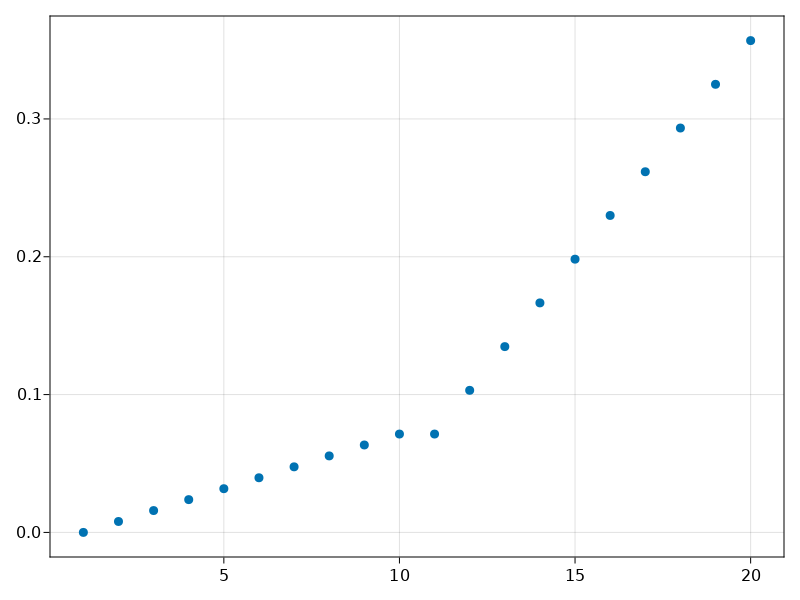

In [25]:
fig=CairoMakie.Figure(backgroundcolor=:tomato, size=(800, 600))
ax = Axis(fig[1,1],  xlabel = "Radius (km)", ylabel = "Density (g/cm^3)", xticks = 0:0.1:1, yticks = 0:1:10) 

#print(typeof(x),typeof(y),typeof(arrayRadius),typeof(arrayDensity))
#CairoMakie.scatter(x,y,markersize=3,markercolor=:black)



CairoMakie.scatter(arrayRadius[1:20])

In [26]:
display(Coefs.C_Qμ)

51×4 Matrix{Float64}:
      0.0             0.0             0.0                0.0
      0.0             0.0             0.0                0.0
      0.0             0.0             0.0                0.0
      0.0             0.0             0.0                0.0
  15490.5        -90048.9             1.75714e5    -114209.0
    390.964       -1112.97         1136.53               0.0
    390.964       -1112.97         1136.53               0.0
  27930.2            -1.53045e5       2.80529e5         -1.71259e5
  27930.2            -1.53045e5       2.80529e5         -1.71259e5
     47.7221        135.67           -1.12663e-11        0.0
      ⋮                                            
   5614.84       -11234.5          5744.36               0.0
    545.835        -440.635          -8.20405e-10        0.0
 -20702.8         43751.7        -22977.4                0.0
 -20702.8         43751.7        -22977.4                0.0
    709.01         -610.11            0.0                0.0

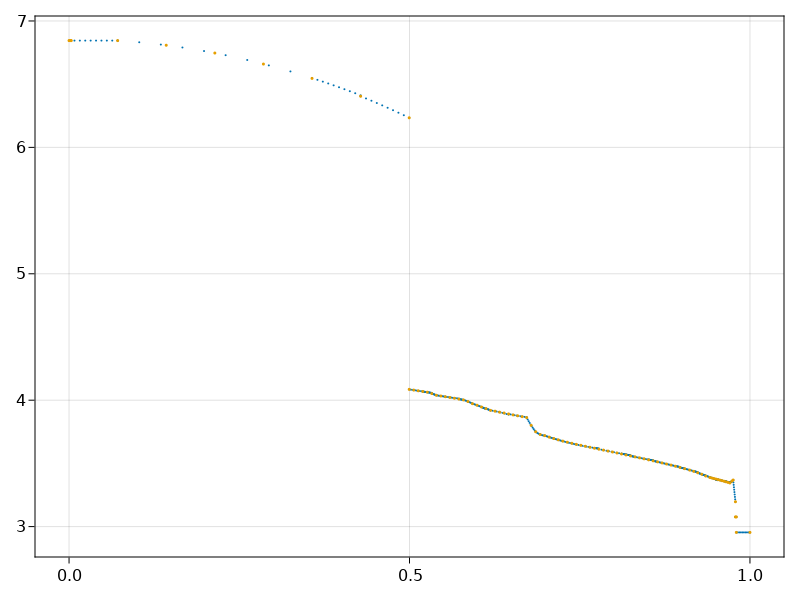

In [27]:

f=Figure()
#ax=Axis(f[1,1], xlabel="Radius (km)", ylabel="Density (g/cm^3)")

scatter(f[1,1],arrayRadius, arrayParams.ρ, markersize=2,markercolor=:red)
scatter!(f[1,1],normalisedRadius,tmpDensity,markersize=3,markercolor=:black)
#xlims!(ax,0.96,1.0)
#ylims!(ax,2.0,3.5)
#xlims!(ax,0.0,0.5)
#ylims!(ax,6.0,7.0)
display(f)

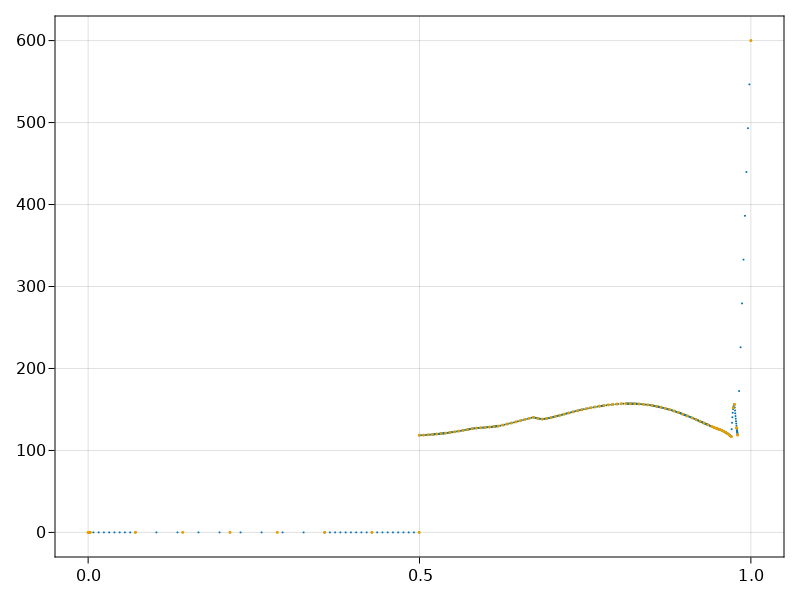

In [28]:
f=Figure()
#ax=Axis(f[1,1], xlabel="Radius (km)", ylabel="Density (g/cm^3)")

scatter(f[1,1],arrayRadius, arrayParams.Qμ, markersize=2,markercolor=:red)
scatter!(f[1,1],normalisedRadius,tmpQμ,markersize=3,markercolor=:black)
#xlims!(ax,0.96,1.0)
#ylims!(ax,2.0,3.5)
#xlims!(ax,0.0,0.5)
#ylims!(ax,6.0,7.0)
display(f)

#Test for TauP models

In [37]:
rawArray=[0.0, 4.52, 2.646, 2.6, 20.482, 4.52, 2.646, 2.6, 20.482, 6.947, 4.066, 2.6, 34.98, 6.947, 4.066, 2.6, 34.98, 7.369, 4.314, 2.6, 71.599, 7.369, 4.314, 2.6, 71.599, 7.791, 4.401, 3.454, 76.559, 7.789, 4.398, 3.454, 81.519, 7.788, 4.395, 3.455, 86.478, 7.787, 4.392, 3.455, 91.438, 7.786, 4.39, 3.455, 96.398, 7.785, 4.387, 3.456, 101.358, 7.784, 4.384, 3.456, 106.318, 7.783, 4.381, 3.456, 111.278, 7.782, 4.378, 3.457, 116.237, 7.781, 4.376, 3.457, 121.197, 7.78, 4.373, 3.457, 126.157, 7.778, 4.37, 3.458, 131.117, 7.777, 4.367, 3.458, 136.077, 7.777, 4.365, 3.458, 141.037, 7.776, 4.362, 3.459, 145.996, 7.775, 4.359, 3.459, 150.956, 7.774, 4.357, 3.459, 155.916, 7.773, 4.354, 3.46, 160.876, 7.772, 4.351, 3.46, 165.836, 7.771, 4.349, 3.46, 170.796, 7.771, 4.346, 3.461, 175.755, 7.77, 4.344, 3.461, 180.715, 7.77, 4.341, 3.461, 185.675, 7.769, 4.338, 3.462, 190.635, 7.768, 4.336, 3.462, 195.595, 7.768, 4.334, 3.462, 200.554, 7.767, 4.331, 3.463, 205.514, 7.767, 4.329, 3.463, 210.474, 7.767, 4.326, 3.463, 215.434, 7.766, 4.324, 3.464, 220.394, 7.765, 4.321, 3.464, 225.354, 7.765, 4.319, 3.465, 230.313, 7.764, 4.316, 3.465, 235.273, 7.764, 4.314, 3.465, 240.233, 7.764, 4.312, 3.466, 245.193, 7.764, 4.309, 3.466, 250.153, 7.763, 4.307, 3.467, 255.113, 7.763, 4.305, 3.467, 260.072, 7.763, 4.302, 3.467, 265.032, 7.763, 4.3, 3.468, 269.992, 7.763, 4.298, 3.468, 274.952, 7.763, 4.296, 3.469, 279.912, 7.762, 4.294, 3.469, 284.872, 7.762, 4.291, 3.47, 289.831, 7.762, 4.289, 3.47, 294.791, 7.762, 4.287, 3.47, 299.751, 7.761, 4.285, 3.471, 304.711, 7.76, 4.282, 3.471, 309.671, 7.759, 4.28, 3.471, 314.631, 7.759, 4.277, 3.472, 319.59, 7.759, 4.275, 3.473, 324.55, 7.759, 4.273, 3.473, 329.51, 7.759, 4.271, 3.474, 334.47, 7.759, 4.269, 3.474, 339.43, 7.759, 4.267, 3.475, 344.39, 7.76, 4.265, 3.475, 349.349, 7.76, 4.263, 3.476, 354.309, 7.76, 4.261, 3.476, 359.269, 7.76, 4.259, 3.477, 364.229, 7.761, 4.258, 3.478, 369.189, 7.763, 4.256, 3.479, 374.149, 7.763, 4.254, 3.479, 379.108, 7.764, 4.253, 3.48, 384.068, 7.766, 4.252, 3.481, 389.028, 7.768, 4.251, 3.482, 393.988, 7.77, 4.25, 3.483, 398.948, 7.772, 4.249, 3.483, 403.908, 7.774, 4.248, 3.484, 408.867, 7.775, 4.247, 3.485, 413.827, 7.777, 4.246, 3.486, 418.787, 7.779, 4.245, 3.487, 423.747, 7.781, 4.244, 3.488, 428.707, 7.783, 4.243, 3.489, 433.667, 7.785, 4.242, 3.49, 438.626, 7.786, 4.241, 3.491, 443.586, 7.788, 4.24, 3.491, 448.546, 7.79, 4.239, 3.492, 453.506, 7.792, 4.238, 3.493, 458.466, 7.794, 4.237, 3.494, 463.426, 7.795, 4.236, 3.495, 468.385, 7.797, 4.235, 3.496, 473.345, 7.799, 4.234, 3.497, 478.305, 7.8, 4.233, 3.498, 483.265, 7.802, 4.232, 3.498, 488.225, 7.804, 4.231, 3.499, 493.185, 7.806, 4.23, 3.5, 498.144, 7.807, 4.229, 3.501, 503.104, 7.809, 4.228, 3.502, 508.064, 7.811, 4.227, 3.503, 513.024, 7.812, 4.226, 3.504, 517.984, 7.814, 4.224, 3.504, 522.944, 7.816, 4.223, 3.505, 527.903, 7.818, 4.222, 3.506, 532.863, 7.819, 4.221, 3.507, 537.823, 7.821, 4.22, 3.508, 542.783, 7.822, 4.219, 3.509, 547.743, 7.824, 4.218, 3.51, 552.702, 7.825, 4.217, 3.51, 557.662, 7.828, 4.216, 3.511, 562.622, 7.834, 4.218, 3.513, 567.582, 7.84, 4.22, 3.515, 572.542, 7.846, 4.221, 3.517, 577.502, 7.853, 4.223, 3.518, 582.461, 7.86, 4.225, 3.52, 587.421, 7.865, 4.227, 3.522, 592.381, 7.871, 4.228, 3.523, 597.341, 7.878, 4.23, 3.525, 602.301, 7.883, 4.231, 3.527, 607.261, 7.89, 4.233, 3.528, 612.22, 7.895, 4.235, 3.53, 617.18, 7.901, 4.236, 3.532, 622.14, 7.907, 4.238, 3.533, 627.1, 7.913, 4.239, 3.535, 632.06, 7.919, 4.241, 3.537, 637.02, 7.925, 4.242, 3.538, 641.979, 7.931, 4.244, 3.54, 646.939, 7.937, 4.246, 3.542, 651.899, 7.943, 4.247, 3.543, 656.859, 7.948, 4.249, 3.545, 661.819, 7.954, 4.25, 3.547, 666.779, 7.96, 4.252, 3.548, 671.738, 7.966, 4.253, 3.55, 676.698, 7.972, 4.255, 3.552, 681.658, 7.978, 4.256, 3.553, 686.618, 7.983, 4.258, 3.555, 691.578, 7.989, 4.259, 3.556, 696.538, 7.994, 4.261, 3.558, 701.497, 8.0, 4.262, 3.56, 706.457, 8.006, 4.264, 3.561, 711.417, 8.011, 4.265, 3.563, 716.377, 8.017, 4.267, 3.564, 721.337, 8.022, 4.268, 3.566, 726.297, 8.028, 4.27, 3.568, 731.256, 8.034, 4.271, 3.569, 736.216, 8.039, 4.273, 3.571, 741.176, 8.044, 4.274, 3.572, 746.136, 8.05, 4.276, 3.574, 751.096, 8.055, 4.277, 3.575, 756.056, 8.061, 4.279, 3.577, 761.015, 8.066, 4.28, 3.579, 765.975, 8.072, 4.281, 3.58, 770.935, 8.077, 4.283, 3.582, 775.895, 8.083, 4.284, 3.583, 780.855, 8.088, 4.286, 3.585, 785.815, 8.094, 4.287, 3.586, 790.774, 8.099, 4.288, 3.588, 795.734, 8.104, 4.29, 3.589, 800.694, 8.109, 4.291, 3.591, 805.654, 8.115, 4.293, 3.593, 810.614, 8.12, 4.294, 3.594, 815.574, 8.126, 4.296, 3.596, 820.533, 8.131, 4.297, 3.597, 825.493, 8.136, 4.298, 3.599, 830.453, 8.141, 4.3, 3.6, 835.413, 8.147, 4.301, 3.602, 840.373, 8.152, 4.303, 3.603, 845.333, 8.158, 4.304, 3.605, 850.292, 8.163, 4.305, 3.606, 855.252, 8.168, 4.307, 3.608, 860.212, 8.173, 4.308, 3.609, 865.172, 8.179, 4.309, 3.611, 870.132, 8.184, 4.311, 3.612, 875.092, 8.189, 4.312, 3.614, 880.051, 8.195, 4.314, 3.615, 885.011, 8.2, 4.315, 3.617, 889.971, 8.205, 4.317, 3.619, 894.931, 8.21, 4.318, 3.62, 899.891, 8.216, 4.319, 3.622, 904.851, 8.221, 4.321, 3.623, 909.81, 8.226, 4.322, 3.625, 914.77, 8.232, 4.324, 3.626, 919.73, 8.237, 4.325, 3.628, 924.69, 8.243, 4.327, 3.629, 929.65, 8.248, 4.328, 3.631, 934.609, 8.253, 4.33, 3.633, 939.569, 8.259, 4.331, 3.634, 944.529, 8.264, 4.333, 3.636, 949.489, 8.269, 4.334, 3.637, 954.449, 8.275, 4.336, 3.639, 959.409, 8.28, 4.337, 3.64, 964.368, 8.285, 4.339, 3.642, 969.328, 8.291, 4.34, 3.644, 974.288, 8.296, 4.342, 3.645, 979.248, 8.301, 4.344, 3.647, 984.208, 8.307, 4.345, 3.648, 989.168, 8.313, 4.347, 3.65, 994.127, 8.319, 4.349, 3.652, 999.087, 8.324, 4.35, 3.653, 1004.047, 8.33, 4.352, 3.655, 1009.007, 8.336, 4.354, 3.657, 1013.967, 8.341, 4.356, 3.659, 1018.927, 8.347, 4.357, 3.66, 1023.886, 8.359, 4.365, 3.662, 1028.846, 8.378, 4.38, 3.665, 1033.806, 8.409, 4.405, 3.669, 1038.766, 8.466, 4.451, 3.677, 1043.726, 8.518, 4.49, 3.688, 1048.686, 8.554, 4.512, 3.697, 1053.645, 8.588, 4.533, 3.707, 1058.605, 8.624, 4.555, 3.716, 1063.565, 8.661, 4.579, 3.726, 1068.525, 8.702, 4.604, 3.737, 1073.485, 8.745, 4.631, 3.749, 1078.445, 8.791, 4.659, 3.761, 1083.404, 8.806, 4.667, 3.765, 1088.364, 8.813, 4.67, 3.768, 1093.324, 8.819, 4.671, 3.77, 1098.284, 8.825, 4.673, 3.772, 1103.244, 8.831, 4.675, 3.774, 1108.204, 8.837, 4.676, 3.776, 1113.163, 8.843, 4.678, 3.779, 1118.123, 8.85, 4.68, 3.781, 1123.083, 8.857, 4.681, 3.784, 1128.043, 8.864, 4.683, 3.787, 1133.003, 8.871, 4.685, 3.79, 1137.963, 8.878, 4.687, 3.793, 1142.922, 8.886, 4.689, 3.797, 1147.882, 8.895, 4.691, 3.8, 1152.842, 8.904, 4.693, 3.805, 1157.802, 8.914, 4.695, 3.809, 1162.762, 8.924, 4.697, 3.815, 1167.722, 8.936, 4.699, 3.821, 1172.681, 8.949, 4.702, 3.827, 1177.641, 8.963, 4.705, 3.835, 1182.601, 8.977, 4.707, 3.842, 1187.561, 8.988, 4.71, 3.847, 1192.521, 8.996, 4.713, 3.85, 1197.481, 9.003, 4.715, 3.853, 1202.44, 9.01, 4.718, 3.856, 1207.4, 9.017, 4.72, 3.858, 1212.36, 9.024, 4.723, 3.861, 1217.32, 9.031, 4.725, 3.864, 1222.28, 9.039, 4.728, 3.866, 1227.24, 9.046, 4.73, 3.869, 1232.199, 9.052, 4.732, 3.871, 1237.159, 9.059, 4.735, 3.874, 1242.119, 9.066, 4.737, 3.876, 1247.079, 9.073, 4.74, 3.879, 1252.039, 9.079, 4.742, 3.881, 1256.999, 9.086, 4.745, 3.884, 1261.958, 9.092, 4.747, 3.886, 1266.918, 9.099, 4.749, 3.888, 1271.878, 9.105, 4.752, 3.891, 1276.838, 9.111, 4.754, 3.893, 1281.798, 9.118, 4.756, 3.895, 1286.757, 9.124, 4.759, 3.898, 1291.717, 9.13, 4.761, 3.9, 1296.677, 9.138, 4.765, 3.902, 1301.637, 9.149, 4.77, 3.905, 1306.597, 9.161, 4.776, 3.909, 1311.557, 9.173, 4.782, 3.912, 1316.516, 9.185, 4.788, 3.915, 1321.476, 9.197, 4.794, 3.918, 1326.436, 9.209, 4.8, 3.921, 1331.396, 9.221, 4.806, 3.925, 1336.356, 9.233, 4.813, 3.928, 1341.316, 9.246, 4.819, 3.931, 1346.275, 9.258, 4.826, 3.934, 1351.235, 9.27, 4.832, 3.938, 1356.195, 9.282, 4.839, 3.941, 1361.155, 9.295, 4.845, 3.944, 1366.115, 9.307, 4.851, 3.948, 1371.075, 9.319, 4.858, 3.951, 1376.034, 9.332, 4.865, 3.955, 1380.994, 9.344, 4.872, 3.958, 1385.954, 9.357, 4.879, 3.962, 1390.914, 9.37, 4.886, 3.965, 1395.874, 9.384, 4.893, 3.969, 1400.834, 9.395, 4.9, 3.973, 1405.793, 9.404, 4.904, 3.975, 1410.753, 9.409, 4.906, 3.977, 1415.713, 9.414, 4.908, 3.979, 1420.673, 9.42, 4.911, 3.981, 1425.633, 9.425, 4.913, 3.983, 1430.593, 9.43, 4.915, 3.985, 1435.552, 9.436, 4.917, 3.987, 1440.512, 9.441, 4.919, 3.989, 1445.472, 9.446, 4.922, 3.991, 1450.432, 9.451, 4.924, 3.994, 1455.392, 9.456, 4.926, 3.995, 1460.352, 9.461, 4.928, 3.997, 1465.311, 9.467, 4.931, 3.999, 1470.271, 9.471, 4.932, 4.001, 1475.231, 9.474, 4.933, 4.003, 1480.191, 9.477, 4.934, 4.004, 1485.151, 9.481, 4.935, 4.006, 1490.111, 9.484, 4.936, 4.007, 1495.07, 9.487, 4.937, 4.009, 1500.03, 9.491, 4.938, 4.011, 1504.99, 9.494, 4.939, 4.012, 1509.95, 9.498, 4.94, 4.014, 1514.91, 9.501, 4.941, 4.015, 1519.87, 9.504, 4.942, 4.017, 1524.829, 9.507, 4.943, 4.018, 1529.789, 9.51, 4.944, 4.02, 1534.749, 9.513, 4.945, 4.021, 1539.709, 9.511, 4.942, 4.024, 1544.669, 9.494, 4.928, 4.029, 1549.629, 9.469, 4.909, 4.035, 1554.588, 9.451, 4.894, 4.039, 1554.588, 9.451, 4.894, 4.039, 1554.588, 5.285, 0.0, 5.851, 1573.123, 5.293, 0.0, 5.863, 1591.657, 5.301, 0.0, 5.875, 1610.192, 5.308, 0.0, 5.886, 1628.726, 5.316, 0.0, 5.898, 1647.261, 5.323, 0.0, 5.91, 1665.795, 5.331, 0.0, 5.921, 1684.329, 5.338, 0.0, 5.933, 1702.864, 5.345, 0.0, 5.944, 1721.398, 5.352, 0.0, 5.955, 1739.933, 5.359, 0.0, 5.966, 1758.467, 5.365, 0.0, 5.977, 1777.002, 5.372, 0.0, 5.988, 1795.536, 5.378, 0.0, 5.998, 1814.071, 5.385, 0.0, 6.009, 1832.605, 5.391, 0.0, 6.019, 1851.139, 5.397, 0.0, 6.03, 1869.674, 5.403, 0.0, 6.04, 1888.208, 5.409, 0.0, 6.05, 1906.743, 5.415, 0.0, 6.06, 1925.277, 5.42, 0.0, 6.07, 1943.812, 5.426, 0.0, 6.079, 1962.346, 5.431, 0.0, 6.089, 1980.881, 5.437, 0.0, 6.098, 1999.415, 5.442, 0.0, 6.108, 2017.949, 5.447, 0.0, 6.117, 2036.484, 5.452, 0.0, 6.126, 2055.018, 5.457, 0.0, 6.135, 2073.553, 5.462, 0.0, 6.144, 2092.087, 5.467, 0.0, 6.153, 2110.622, 5.472, 0.0, 6.161, 2129.156, 5.476, 0.0, 6.17, 2147.69, 5.481, 0.0, 6.178, 2166.225, 5.485, 0.0, 6.186, 2184.759, 5.489, 0.0, 6.194, 2203.294, 5.494, 0.0, 6.202, 2221.828, 5.498, 0.0, 6.21, 2240.363, 5.502, 0.0, 6.218, 2258.897, 5.506, 0.0, 6.226, 2277.432, 5.51, 0.0, 6.233, 2295.966, 5.514, 0.0, 6.241, 2314.5, 5.517, 0.0, 6.248, 2333.035, 5.521, 0.0, 6.255, 2351.569, 5.525, 0.0, 6.262, 2370.104, 5.528, 0.0, 6.269, 2388.638, 5.531, 0.0, 6.276, 2407.173, 5.535, 0.0, 6.283, 2425.707, 5.538, 0.0, 6.289, 2444.242, 5.541, 0.0, 6.296, 2462.776, 5.544, 0.0, 6.302, 2481.31, 5.547, 0.0, 6.308, 2499.845, 5.55, 0.0, 6.314, 2518.379, 5.553, 0.0, 6.32, 2536.914, 5.556, 0.0, 6.326, 2555.448, 5.559, 0.0, 6.332, 2573.983, 5.561, 0.0, 6.338, 2592.517, 5.564, 0.0, 6.343, 2611.051, 5.567, 0.0, 6.348, 2629.586, 5.569, 0.0, 6.354, 2648.12, 5.571, 0.0, 6.359, 2666.655, 5.574, 0.0, 6.364, 2685.189, 5.576, 0.0, 6.369, 2703.724, 5.578, 0.0, 6.373, 2722.258, 5.58, 0.0, 6.378, 2740.793, 5.582, 0.0, 6.382, 2759.327, 5.584, 0.0, 6.387, 2777.861, 5.586, 0.0, 6.391, 2796.396, 5.588, 0.0, 6.395, 2814.93, 5.59, 0.0, 6.399, 2833.465, 5.592, 0.0, 6.403, 2851.999, 5.594, 0.0, 6.407, 2870.534, 5.595, 0.0, 6.41, 2889.068, 5.597, 0.0, 6.414, 2907.603, 5.598, 0.0, 6.417, 2926.137, 5.6, 0.0, 6.42, 2944.671, 5.601, 0.0, 6.423, 2963.206, 5.602, 0.0, 6.426, 2981.74, 5.604, 0.0, 6.429, 3000.275, 5.605, 0.0, 6.432, 3018.809, 5.606, 0.0, 6.435, 3037.344, 5.607, 0.0, 6.437, 3055.878, 5.608, 0.0, 6.439, 3074.413, 5.609, 0.0, 6.442, 3092.947, 5.61, 0.0, 6.444, 3111.481, 5.611, 0.0, 6.446, 3130.016, 5.612, 0.0, 6.447, 3148.55, 5.612, 0.0, 6.449, 3167.085, 5.613, 0.0, 6.451, 3185.619, 5.614, 0.0, 6.452, 3204.154, 5.614, 0.0, 6.454, 3222.688, 5.615, 0.0, 6.455, 3241.222, 5.615, 0.0, 6.456, 3259.757, 5.616, 0.0, 6.457, 3278.291, 5.616, 0.0, 6.458, 3296.826, 5.616, 0.0, 6.458, 3315.36, 5.617, 0.0, 6.459, 3333.895, 5.617, 0.0, 6.459, 3352.429, 5.617, 0.0, 6.46, 3370.964, 5.617, 0.0, 6.46, 3389.498, 5.617, 0.0, 6.46, 3389.498, 5.617, 1.0, 6.46, 3389.5, 5.617, 1.0, 6.46]

1636-element Vector{Float64}:
    0.0
    4.52
    2.646
    2.6
   20.482
    4.52
    2.646
    2.6
   20.482
    6.947
    ⋮
    6.46
 3389.498
    5.617
    1.0
    6.46
 3389.5
    5.617
    1.0
    6.46

In [46]:
nLayers=length(rawArray)/4
tmpaveragedPlanetRadius=rawArray[end-3]
tmpRadius=tmpaveragedPlanetRadius.-rawArray[end-3:-4:1]
tmpDensity=rawArray[end-2:-4:2]
tmpVp=rawArray[end-1:-4:3]
tmpVs=rawArray[end:-4:4]
tmpRadius
for i in 1:length(tmpRadius)
    #println(tmpVsv[i])
    if tmpVs[i] != 0.0
        tmpaveragedPlanetRadius=tmpRadius[i]
    end
end

In [34]:
tmpRadius

Float64[]

f=Figure()
#ax=Axis(f[1,1], xlabel="Radius (km)", ylabel="Density (g/cm^3)")

scatter(f[1,1],arrayRadius, arrayParams.Qμ, markersize=2,markercolor=:red)
scatter!(f[1,1],normalisedRadius,tmpQμ,markersize=3,markercolor=:black)

In [ ]:



# we fusion at the end

tmpDensityCoefsSecond=[]
newBottomRadius=[]
newTopRadius=[]
nLayersSecond=0
i=1
while i <= nLayers
    newTmpBottomRadius=normalisedtmpBottomRadius[i]
    newTmpDensityCoefs=[]
    print("i=",i,"\n")
    if tmpDensityCoefs[i][2] != 0.e0
        print("change in slope:", abs(tmpDensityCoefs[i][2]-tmpDensityCoefs[i+1][2])/abs(tmpDensityCoefs[i][2]),"\n")
    end
    if tmpDensityCoefs[i] == tmpDensityCoefs[i+1] && i+1 <= nLayers
        print("hit i=",i,"\n")
        # this layer should be fusioned with the next one (zeroth or first order polynomials)
        while tmpDensityCoefs[i] == tmpDensityCoefs[i+1] && i+1 <= nLayers
            print("hit hit i=",i,"\n")
            newTmpTopRadius=normalisedtmpTopRadius[i+1]
            newTmpDensityCoefs=tmpDensityCoefs[i]
            i+=1
        end
        
    elseif abs(tmpDensityCoefs[i][2]-tmpDensityCoefs[i+1][2])/abs(tmpDensityCoefs[i][2]) < 傾き許容度 && i+1 <= nLayers && tmpDensityCoefs[i][2] != 0.e0 <= nLayers
        print("katamuki i=",i,"\n")
        # This layer should be fusioned with the next one with a second or third order polynomials
        # We need to do this a bit more carefully than the previous case
        # First we will count the possible number of layers that can be fusioned
        iStart=i
        iEnd=i
        while abs(tmpDensityCoefs[i][2]-tmpDensityCoefs[i+1][2])/abs(tmpDensityCoefs[i][2]) < 傾き許容度 && i+1 <= nLayers && tmpDensityCoefs[i][2] != 0.e0
            iEnd=i
            i+=1
        end
        numberPotentiallyFusionedLayers=iEnd-iStart+1
        print("numberPotentiallyFusionedLayers=",numberPotentiallyFusionedLayers,"\n")
        print(iEnd)
        # First we get the 2nd order polynomial that fits the density of the fusioned layers (if possible)
        temporarySecondOrderPolynomialCoefs=[]
      
        for j=iStart:iEnd-2   
            a₀⁰=tmpDensityCoefs[j][1]
            a₁⁰=tmpDensityCoefs[j][2]
            a₀¹=tmpDensityCoefs[j+1][1]
            a₁¹=tmpDensityCoefs[j+1][2]
            a₀²=tmpDensityCoefs[j+2][1]
            a₁²=tmpDensityCoefs[j+2][2]
            x₀=normalisedtmpBottomRadius[j]
            x₁=normalisedtmpBottomRadius[j+1]
            x₂=normalisedtmpBottomRadius[j+2]
            y₀=tmpDensity[j]
            b₂⁰ = (a₁¹-a₁⁰)/(x₂-x₀)
            averageA₁=(a₁⁰*(x₂-x₁)+a₁¹*(x₁-x₀))/(x₂-x₀) # effective slope at the middle point
            b₁⁰ = averageA₁-2*b₂⁰*x₁
            b₀⁰ = y₀-b₁⁰*x₀-b₂⁰*x₀^2
            push!(temporarySecondOrderPolynomialCoefs,[b₀⁰,b₁⁰,b₂⁰])   
        end 
        print(temporarySecondOrderPolynomialCoefs)
    
        

        newTmpTopRadius=normalisedtmpTopRadius[i]
        newTmpDensityCoefs=tmpDensityCoefs[i]
        i+=1
    else
        # this layer should not be fusioned with the next one
        print("no fusion, i=",i,"\n")
        newTmpTopRadius=normalisedtmpTopRadius[i]
        newTmpDensityCoefs=tmpDensityCoefs[i]
        i+=1
    end
    print("hit hit hit i=",i,"\n")
    push!(tmpDensityCoefsSecond,newTmpDensityCoefs)
    push!(newBottomRadius,newTmpBottomRadius)
    push!(newTopRadius,newTmpTopRadius)
    nLayersSecond+=1
   
end

In [ ]:
# old protocol

傾き許容度=1.e-1

nLayers=0
normalisedtmpBottomRadius=[]
normalisedtmpTopRadius=[]
tmpDensityCoefs=[]
for i in 1:length(normalisedRadius)-1
    if normalisedRadius[i] != normalisedRadius[i+1]
        nLayers+=1
        a=(tmpDensity[i+1]-tmpDensity[i])/(normalisedRadius[i+1]-normalisedRadius[i])
        b=tmpDensity[i]-a*normalisedRadius[i]
        push!(tmpDensityCoefs,[b,a])
        push!(normalisedtmpBottomRadius,normalisedRadius[i])
        push!(normalisedtmpTopRadius,normalisedRadius[i+1])
    end
end
#println(nLayers)
#println(tmpDensityCoefs)

tmpDensityCoefsSecond=[]
newBottomRadius=[]
newTopRadius=[]
nLayersSecond=0
i=1
while i <= nLayers
    newTmpBottomRadius=normalisedtmpBottomRadius[i]
    newTmpDensityCoefs=[]
    print("i=",i,"\n")
    if tmpDensityCoefs[i][2] != 0.e0
        print("change in slope:", abs(tmpDensityCoefs[i][2]-tmpDensityCoefs[i+1][2])/abs(tmpDensityCoefs[i][2]),"\n")
    end
    if tmpDensityCoefs[i] == tmpDensityCoefs[i+1] && i+1 <= nLayers
        print("hit i=",i,"\n")
        # this layer should be fusioned with the next one (zeroth or first order polynomials)
        while tmpDensityCoefs[i] == tmpDensityCoefs[i+1] && i+1 <= nLayers
            print("hit hit i=",i,"\n")
            newTmpTopRadius=normalisedtmpTopRadius[i+1]
            newTmpDensityCoefs=tmpDensityCoefs[i]
            i+=1
        end
        
    elseif abs(tmpDensityCoefs[i][2]-tmpDensityCoefs[i+1][2])/abs(tmpDensityCoefs[i][2]) < 傾き許容度 && i+1 <= nLayers && tmpDensityCoefs[i][2] != 0.e0 <= nLayers
        print("katamuki i=",i,"\n")
        # This layer should be fusioned with the next one with a second or third order polynomials
        # We need to do this a bit more carefully than the previous case
        # First we will count the possible number of layers that can be fusioned
        iStart=i
        iEnd=i
        while abs(tmpDensityCoefs[i][2]-tmpDensityCoefs[i+1][2])/abs(tmpDensityCoefs[i][2]) < 傾き許容度 && i+1 <= nLayers && tmpDensityCoefs[i][2] != 0.e0
            iEnd=i
            i+=1
        end
        numberPotentiallyFusionedLayers=iEnd-iStart+1
        print("numberPotentiallyFusionedLayers=",numberPotentiallyFusionedLayers,"\n")
        print(iEnd)
        # First we get the 2nd order polynomial that fits the density of the fusioned layers (if possible)
        temporarySecondOrderPolynomialCoefs=[]
      
        for j=iStart:iEnd-2   
            a₀⁰=tmpDensityCoefs[j][1]
            a₁⁰=tmpDensityCoefs[j][2]
            a₀¹=tmpDensityCoefs[j+1][1]
            a₁¹=tmpDensityCoefs[j+1][2]
            a₀²=tmpDensityCoefs[j+2][1]
            a₁²=tmpDensityCoefs[j+2][2]
            x₀=normalisedtmpBottomRadius[j]
            x₁=normalisedtmpBottomRadius[j+1]
            x₂=normalisedtmpBottomRadius[j+2]
            y₀=tmpDensity[j]
            b₂⁰ = (a₁¹-a₁⁰)/(x₂-x₀)
            averageA₁=(a₁⁰*(x₂-x₁)+a₁¹*(x₁-x₀))/(x₂-x₀) # effective slope at the middle point
            b₁⁰ = averageA₁-2*b₂⁰*x₁
            b₀⁰ = y₀-b₁⁰*x₀-b₂⁰*x₀^2
            push!(temporarySecondOrderPolynomialCoefs,[b₀⁰,b₁⁰,b₂⁰])   
        end 
        print(temporarySecondOrderPolynomialCoefs)
    
        

        newTmpTopRadius=normalisedtmpTopRadius[i]
        newTmpDensityCoefs=tmpDensityCoefs[i]
        i+=1
    else
        # this layer should not be fusioned with the next one
        print("no fusion, i=",i,"\n")
        newTmpTopRadius=normalisedtmpTopRadius[i]
        newTmpDensityCoefs=tmpDensityCoefs[i]
        i+=1
    end
    print("hit hit hit i=",i,"\n")
    push!(tmpDensityCoefsSecond,newTmpDensityCoefs)
    push!(newBottomRadius,newTmpBottomRadius)
    push!(newTopRadius,newTmpTopRadius)
    nLayersSecond+=1
   
end

In [ ]:
# test some ideas
@variables x₀, x₁, x₂, x₃
@variables y₀, y₁, y₂, y₃
@variables x
D = Differential(x)
# linear interpolation

a₁⁰  = (y₁-y₀)/(x₁-x₀)
a₀⁰= y₁-a₁⁰*x₁
a₁¹  = (y₂-y₁)/(x₂-x₁)
a₀¹= y₂-a₁¹*x₂
a₁²  = (y₃-y₂)/(x₃-x₂)
a₀²= y₃-a₁²*x₃

f⁰(x)=a₀⁰+a₁⁰ *x
f¹(x)=a₀¹+a₁¹ *x
f²(x)=a₀²+a₁² *x

print("linear at 0: ", simplify(f⁰(x₀)),"\n")
print("linear at 1: ", simplify(f⁰(x₁)),"\n")


In [ ]:
# 2nd order interpolation
b₂⁰ = (a₁¹-a₁⁰)/(x₂-x₀)
averageA₁=(a₁⁰*(x₂-x₁)+a₁¹*(x₁-x₀))/(x₂-x₀) # effective slope at the middle point
b₁⁰ = averageA₁-2*b₂⁰*x₁
b₀⁰ = y₀-b₁⁰*x₀-b₂⁰*x₀^2

b₂¹ = (a₁²-a₁¹)/(x₃-x₁)
averageA₂=(a₁¹*(x₃-x₂)+a₁²*(x₂-x₁))/(x₃-x₁) # effective slope at the middle point
b₁¹ = averageA₂-2*b₂¹*x₂
b₀¹ = y₁-b₁¹*x₁-b₂¹*x₁^2

g⁰(x)=b₀⁰+b₁⁰*x+b₂⁰*x^2
g¹(x)=b₀¹+b₁¹*x+b₂¹*x^2

print("second order at 0 with 0th function:",simplify(g⁰(x₀)),"\n")
print("second order at 1 with 0th function:",simplify(g⁰(x₁)),"\n")
print("second order at 2 with 0th function:",simplify(g⁰(x₂)),"\n")
print("second order at 1 with 1st function:",simplify(g¹(x₁)),"\n")
print("second order at 2 with 1st function:",simplify(g¹(x₂)),"\n")
print("second order at 3 with 1st function:",simplify(g¹(x₃)),"\n")

In [ ]:
# 3rd order interpolation (cubic spline)
# The second derivatives from two functions
#b₂=(b₂⁰*(X₁-X)+b₂¹*(X-X₀))/(X₁-X₀)

#c₃=2*(b₂¹-b₂⁰)/(6*(x₃-x₀)/2)

c₃ = (4//3)*((a₁¹-a₁⁰)/(x₂-x₀)-(a₁²-a₁¹)/(x₃-x₁))/(x₀+x₁-x₂-x₃)
# c₃ correction
y₂ₐ = y₂ - c₃*x₂^3
y₁ₐ = y₁ - c₃*x₁^3
y₀ₐ = y₀ - c₃*x₀^3
a₁¹ₐ = (y₂ₐ-y₁ₐ)/(x₂-x₁)
a₁⁰ₐ = (y₁ₐ-y₀ₐ)/(x₁-x₀)
b₂ₐ = (a₁¹ₐ-a₁⁰ₐ)/(x₂-x₀)
AverageAₐ₁=(a₁⁰ₐ*(x₂-x₁)+a₁¹ₐ*(x₁-x₀))/(x₂-x₀) # effective slope at the middle point
b₁ₐ = AverageAₐ₁-2*b₂ₐ*x₁
b₀ₐ = y₀ₐ-b₁ₐ*x₀-b₂ₐ*x₀^2

c₂ = b₂ₐ
c₁ = b₁ₐ
c₀ = b₀ₐ

h(x)=c₀+c₁*x+c₂*x^2+c₃*x^3
print("0: ", h(x₀))
h(x₂)


#c₂= (2*b₂-6*c₃*X)/2
#c₁= b₁⁰+2*b₁⁰*X-3*c₃*X^2-2*c₂*X
#c₀ = y₁-c₁*x₁-c₂*x₁^2-c₃*x₁^3

#c₃ = simplify((2*b₂¹-2*b₂⁰)/((x₂-x₁)*6))

#c₂ = simplify((2*b₂⁰-6*c₃*x₁)/2)
#c₁ = simplify(b₁⁰+2*b₁⁰*x₁-3*c₃*x₁^2-2*c₂*x₁)
#c₀ = simplify(y₁-c₁*x₁-c₂*x₁^2-c₃*x₁^3)
#h(x)=c₀+c₁*x+c₂*x^2+c₃*x^3
#h(x₀)
#simplify(h(x₀))
#print("third order at 0 with 0th function:",simplify(h(x₀)),"\n")

Zeroth:
\begin{equation}
h(x)= c_0+c_1 x+c_2 x^2 +c_3 x^3
\end{equation}
First:
\begin{equation}
h^\prime(x)= c_1 + 2c_2 x +3 c_3 x^2
\end{equation}
Second:
\begin{equation}
h^{\prime \prime}(x) = 2c_2 +6 c_3 x
\end{equation}

Whereas we got localised functions:
\begin{equation}
g^0(x)= b_0^0 + b_1^0 x + b_2^0 x^2
\end{equation}

\begin{equation}
g^1(x) = b_0^1 + b_1^1 x + b_2^1 x^2
\end{equation}

First:
\begin{equation}
g^{0\prime}(x)= b_1^0  + 2 b_2^0 x
\end{equation}

\begin{equation}
g^{1\prime}(x) = b_1^1 + 2 b_2^1 x
\end{equation}

Second:
\begin{equation}
g^{0\prime \prime}(x)=  2 b_2^0 
\end{equation}

\begin{equation}
g^{1\prime \prime}(x) = 2 b_2^1 
\end{equation}


\begin{equation}
\mathbf{b}_0 = [b_0^0 b_1^0 b_2^0]^T
\end{equation}

\begin{equation}
\mathbf{b}_1 = [b_0^1 b_1^1 b_2^0]^T
\end{equation}

\begin{equation}
B_0 \mathbf{b}_0 = \mathbf{y}_0
\end{equation}

\begin{equation}
B_1 \mathbf{b}_1 = \mathbf{y}_1
\end{equation}

\begin{equation}
C\mathbf{c} = \mathbf{y}
\end{equation}

In [ ]:
fig=CairoMakie.Figure(backgroundcolor=:tomato, size=(800, 600))
ax = Axis(fig[1,1],  xlabel = "Radius (km)", ylabel = "Density (g/cm^3)", xticks = 0:0.1:1, yticks = 0:1:10) 
x=normalisedRadius
y=densityInGramsPerCm3
scatter!(ax,x,y,markersize=3,markercolor=:black)
fig

In [ ]:
mutable struct TんP
    length:: Float64
    width:: Float64
    age:: Float64
    итальянская:: Float64

    function TんP()
        # This constructs an empty TんP
        return new(3.e0, 0.e0, 1.e0, 0.e0)
    end

    function TんP(length::Float64, width::Float64, age::Float64, итальянская::Float64)
        # This constructs a TんP with the given parameters
        return new(length, width, age, итальянская)
    end 

    function TんP(length::Float64, width::Float64, age::Float64)
        # This constructs a TんP with the given parameters
        tmp=length*width*width/(30.e0*9.e0)*abs(age-30.e0)/30.e0
        return new(length, width, age, tmp)
    end
        
end
function AわB!(C::TんP)
    C.итальянская = C.length*C.width*C.age
    return nothing
end
AわB(C::TんP) = (U = deepcopy(C); AわB!(U); return U)

In [ ]:
KにS = TんP()
KにS.width = 10000
AわB!(KにS)
KにS